# Email Spam detection

In [1]:
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
import seaborn as sns
import string

In [2]:
email=pd.read_csv('emails.csv')
email.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


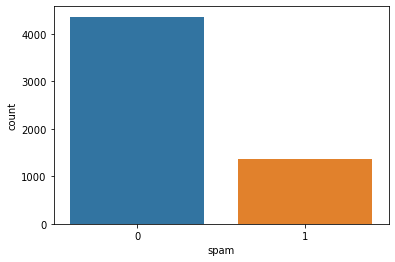

In [3]:
sns.countplot(x='spam',data=email)

As we can see the data is oversampled towards '0'. For this model i am gonna leave the data as it is . In future we will convert the data equal so that we can get accurate results.

In [4]:
email.shape

(5728, 2)

In [5]:
email.isnull().sum()

text    0
spam    0
dtype: int64

##### checking is there any duplicates in data

In [6]:
email.drop_duplicates(inplace=True)

In [7]:
email.shape

(5695, 2)

In [8]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#### creating a simple program to remove stopwords,punctuation and converting all to lowercase for model building

In [9]:
def process_data(text):
    no_punc=[char for char in text if char not in string.punctuation]
    no_punc=''.join(no_punc)
    
    clean_words=[word for word in no_punc.split() if word.lower() not in stopwords.words('english')]
    return clean_words


In [10]:
email['text'].head().apply(process_data)

0    [Subject, naturally, irresistible, corporate, ...
1    [Subject, stock, trading, gunslinger, fanny, m...
2    [Subject, unbelievable, new, homes, made, easy...
3    [Subject, 4, color, printing, special, request...
4    [Subject, money, get, software, cds, software,...
Name: text, dtype: object

### Bag of words

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

In [12]:
messages_bow=CountVectorizer(analyzer=process_data).fit_transform(email['text'])

In [13]:
messages_bow.shape

(5695, 37229)

# Model : Multinomial-Naive bayes calssifier

In [14]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(messages_bow,email['spam'],test_size=0.2,random_state=42)

In [15]:
from sklearn.naive_bayes import MultinomialNB
classifier =MultinomialNB().fit(x_train,y_train)

In [16]:
print(classifier.predict(x_train))
print(y_train.values)

[0 1 0 ... 0 0 1]
[0 1 0 ... 0 0 1]


In [17]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
pred=classifier.predict(x_train)
print(classification_report(y_train,pred))
print('confusion matrix:\n', confusion_matrix(y_train,pred))
print('accuracy:',accuracy_score(y_train,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3484
           1       0.99      1.00      0.99      1072

    accuracy                           1.00      4556
   macro avg       1.00      1.00      1.00      4556
weighted avg       1.00      1.00      1.00      4556

confusion matrix:
 [[3474   10]
 [   2 1070]]
accuracy: 0.9973661106233538


### Confusion Mtrix

In [18]:
cm = confusion_matrix(y_train,pred)
cm

array([[3474,   10],
       [   2, 1070]], dtype=int64)

In [19]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

print(f'Mean Absolute Error : {mean_absolute_error(pred,y_train)}')
print(f'Mean Squared Error : {mean_squared_error(pred,y_train)}')
print(f'Root Mean Squared Error : {np.sqrt(mean_squared_error(pred,y_train))}')
print(f'R-squared : {r2_score(y_train,pred)}')

Mean Absolute Error : 0.0026338893766461808
Mean Squared Error : 0.0026338893766461808
Root Mean Squared Error : 0.051321431942670706
R-squared : 0.985361653272101


### Now we are predicting our results on test dataset

In [20]:
print(classifier.predict(x_test))
print(y_test.values)

[0 1 0 ... 0 1 1]
[0 1 0 ... 0 1 1]


In [21]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
pred=classifier.predict(x_test)
print(classification_report(y_test,pred))
print('confusion matrix:\n', confusion_matrix(y_test,pred))
print('accuracy:',accuracy_score(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       843
           1       0.97      0.99      0.98       296

    accuracy                           0.99      1139
   macro avg       0.98      0.99      0.99      1139
weighted avg       0.99      0.99      0.99      1139

confusion matrix:
 [[834   9]
 [  2 294]]
accuracy: 0.990342405618964


In [22]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

print(f'Mean Absolute Error : {mean_absolute_error(pred,y_test)}')
print(f'Mean Squared Error : {mean_squared_error(pred,y_test)}')
print(f'Root Mean Squared Error : {np.sqrt(mean_squared_error(pred,y_test))}')
print(f'R-squared : {r2_score(y_test,pred)}')

Mean Absolute Error : 0.009657594381035996
Mean Squared Error : 0.009657594381035996
Root Mean Squared Error : 0.09827306030156992
R-squared : 0.9497892020134013


We  got good accuracy on both test and train dataset .still we can imporve our model in future by impleting more techniques(over sampling). 